<a href="https://colab.research.google.com/github/tejasvee98/MA471-Survival-Analysis/blob/main/Parametric%20Survival%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Properties of a Survival Function $S_{x}(t)$**

*$S_x$(t): The probability that someone at age x does survive t additional years.* ​

**Property 1:** $S_x$(0) = 1. Everyone who survived to age x is alive at the beginning of the time period beyond x.​

**Property 2:**  $S_x(\infty) = 0$. No one lives infinitely long beyond x.  ​

**Property 3:** If $t_1 < t_2$ then $S_x (t_1) \geq S_x (t_2)$. The function $S_x$ (t) is non-increasing.​

**Survival Models​**

Let  $ {T_x} $ = (Future lifelength beyond age x of an individual who
has survived till age x. The total lifelength of an individual will be
x +  $ {T_x}$

**Distribution Function​**

$ {F_x(t) =  \int_{0}^{t} f_x(s) \,ds } $

Either of the functions ${f_x(t)}$ or ${F_x(t)}$ are used to describe the future lifetime distribution beyond age x. Clearly, ${F_x(t)}$ is the probability that someone who has survived till age x will not survive beyond age x+t.

Let ${T_0}$ denote the total lifelenght of an individual.Then 

$ \Large {F_x(t)} = P[ T_x \leq t] = P[x < T_0 \leq x+t | T_0 > x] $ \\

$\hspace{1cm}$ 
= $\Large \frac{P[x < T_0 \leq x+t] }{P[T_0 >x]}$ \\

$\Large { F_x(t) = \frac{S_0(x) - S_0(x+t)}{S_0(x)} = 1 - \frac{S_0(x+t)}{S_0(x)} }$

$\Large { F_0(t) = 1 - \frac{S_0(t)}{S_0(0)} = 1 - S_0(t) }$

**Mortality Function or Hazard Function​
(as described in class)​**

It is the rate of death among persons who have survived to an age​

Define Force of Mortality at age x to be

$ \Large \mu_x  =  \lim_{dx\to0} \frac{P[x < T_0 \leq x+t | T_0 > x]}{dx} $

So, Force of Mortality becomes​

$ \Large \mu_x  =  \lim_{dx\to0} \frac{\frac{F_0(x+dx) - F_0(x)}{dx}}{S_0(x)} $



We have this equation from above

$\Large { F_0(x) = 1 - \frac{S_0(x)}{S_0(0)} = 1 - S_0(x) }$

$ \Large \mu_x = \frac{F_0'(x)}{S_0(x)} \Big|t=x $

$ \Large = -\frac{S_0(x)'}{S_0(x)} $





$\Large \mu_x = \frac{d}{dx} [-\ln(S_0(x))] $ 


$ \Large \int_{0}^{t} \mu_x \,dx =  {  -\ln(S_0(t)) + -\ln(S_0(0)) }$








We can see that

$\Large S_X(t) =  \frac{P[T_0 \geq x+t] }{P[T_0 >x]} = \frac{S_0(x+t)}{S_0(x)} $

It follows

$\Large S_X(t)  = \frac{S_0(x+t)}{S_0(x)}  = 
\frac{e^{-\int_{0}^{x+t} {\mu}_{r} dr}}{e^{-\int_{0}^{x} {\mu}_{r} dr}} $

$\Large = e^{-\int_{x}^{x+t} {\mu}_{r} dr} = e^{-\int_{0}^{t} {\mu}_{x+r} dr} $


**Makeham Law of Mortality (1860):​ **
​

Considers $\mu_x(t)$ as an exponential function in terms of A,B,C where A > 0, 0 < B < 1 and C > 1. ​

$\Large { {{\mu}(x) = A + BC^{x}}}$


$ \Large {{\mu}(x+r) = A + BC^{x}C^{r}}$

$ \Large {S_x(t) = e^{-\int_{0}^{t} {\mu}_{x+r} dr}}$

$ \Large {S_x(t) = e^{-A\int_{0}^{t} dr -BC^x\int_{0}^{t}C^r dr }  }$

$ \Large { = e^{-tA -\frac{BC^x}{\ln(C)} (C^t -1) }  }$



​








In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## **Fitting the Survival Function**

**We are fitting the curve on columns Age and S from the CSV file**
Here S is $S_{0}(t)$. Hence, we put x=0 in the formula of Makeham Law.

In [29]:
def survival_function_formula(t,A,B,C):
    return np.exp(-(t*A +B*(pow(C,t)-1)/np.log(C)))

In [30]:
#Importing Data
url='https://raw.githubusercontent.com/tejasvee98/MA471-Survival-Analysis/main/MA471_data.csv'
df = pd.read_csv(url)
age=df['Age']
S=df['S']

We are using curve_fit from scipy library. We have defined Survival functions with the parameters A,B,C and will compute these values​.

**Function Used Explained:**

scipy.optimize.curve_fit(f, xdata, ydata, p0, bounds)


f: The model function, f(x, …). It must take the independent variable as the first argument and the parameters to fit as separate remaining argument​

xdata : The independent variable​

ydata : The dependent data​

p0: Initial guess for the parameters ​

bounds : Lower and upper bounds on parameters​

We are using curve_fit function to fit the survival function on the independent variable age and dependent variable Survival Function, S, to calculate probability of survival of t years.​
​

Parameters A,B, C are 1.0 0.5 1.0000000001 respectively
Plot of estimated (dashed line) and actual (solid line) functions:


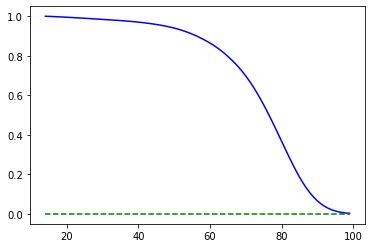

In [31]:
plt.plot(age, S, 'b-', label='data')
popt, pcov = curve_fit(survival_function_formula, age, S, p0 = [1, 0.5, 1], bounds=((0,0,1), (float('inf'), 1., float('inf'))))
print("Parameters A,B, C are", *popt, "respectively")
print("Plot of estimated (dashed line) and actual (solid line) functions:")
plt.plot(age, survival_function_formula(age, *popt), 'g--',label='fit: A=%5.3f, B=%5.3f, c=%5.3f' % tuple(popt))

**We had a problem.** We were getting flattened curves and popt (vector of parameters) that was returned was same as p0 or very slightly progressed from p0. Below is one of the only cases of p0 where some progress was scene.
A flattened curve using Scipy Curve Fit is an indicator of the function blowing up.  We can see that the function has blown up. In the survival function we have C to the power of t where C>1 and t goes up till 99. For large value of t, the function blows up. Hence the values of parameter A and B hasn't changed and C has only progressed by .0000000001.

## **Solution to Blowing Up​**

We have used ageNormalized = age/100 as a method of normalization​. This is basically only changing the unit of time and hence it does not affect the calculations in our case.
​

Parameters A,B, C are 0.03765461898585783 0.002398809875434788 33760.981692599475 respectively
Plot of estimated (dashed line) and actual (solid line) functions:


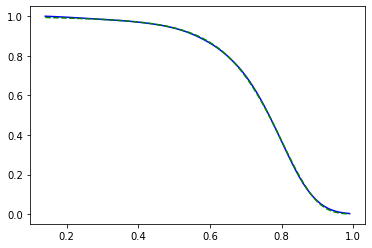

In [32]:
ageNormalized= age/100
plt.plot(ageNormalized, S, 'b-', label='data')
popt, pcov = curve_fit(survival_function_formula, ageNormalized, S, p0 = [1, 0.5, 1], bounds=((0,0,1), (float('inf'), 1., float('inf'))))
print("Parameters A,B, C are", *popt, "respectively")
print("Plot of estimated (dashed line) and actual (solid line) functions:")
plt.plot(ageNormalized, survival_function_formula(ageNormalized, *popt), 'g--',label='fit: A=%5.3f, B=%5.3f, c=%5.3f' % tuple(popt))

We can see that the function now is fitting well after normalization. The final value of c is 33760.98. We couldn't have gotten at this value without normalization as pow(C,t) was blowing up at C just a little greater than 1, there was no way it would have reached to 33760.98​.

In [33]:
print("The probability of surviving three more months if a person has survived 60 years is: ", survival_function_formula(0.6025, *popt)/survival_function_formula(0.60, *popt))

The probability of surviving three more months if a person has survived 60 years is:  0.9967441051976619


In [34]:
sigma = np.sqrt(np.diag(pcov)) #standard deviation errors on the parameters
print("The standard deviations for A,B,C are", sigma, "respectively")

The standard deviations for A,B,C are [1.81009148e-03 7.12964184e-05 1.37358796e+03] respectively


## **Confidence Intervals**

A confidence interval is a type of estimate computed from the statistics of the observed data. This proposes a range of plausible values for an unknown parameter. The interval has an associated confidence level that the true parameter is in the proposed range. The confidence level represents the frequency  of possible confidence intervals that contain the true value of the unknown  parameter. In other words, if confidence intervals are constructed using a given confidence level from an infinite number of independent sample statistics, the proportion of those intervals that contain the true value of the parameter will be equal to the confidence level.

**Parametric Bootstrapping To Compute Confidence Intervals of Fitted Parameters**

$θ$ is the vector of parameters whose values we wish to find along with the confidence intervals. Parametric bootstrapping is used to achieve this. Steps involved in Parametric Bootstrapping:

1. Find $\widehat{θ}$ that estimates $θ$.
2. Bootstrap samples are drawn from F($\widehat{θ}$).
3. For each bootstrap sample $x_{1}^{*}$, . . . , $x_{n}^{*}$
we compute $θ_{temp}$.
4. $θ_{temp}$ is appended to the matrix $\widehat{θ}^{*}$ whose rows store values of parameters derived from each sample.
5. After calculation of $\widehat{θ}^{*}$ is complete, the bootstrap difference $δ^{*}$ = $\widehat{θ}^{*}$ − $\widehat{θ}$ is calculated.
4. The bootstrap principle says that the distribution of $δ^{*}$ approximates the distribution of $δ$ = $\widehat{θ}$ − $θ$. We use the bootstrap differences to make a bootstrap confidence interval for $θ$.

In [35]:
def getConfidenceIntervals(func, thetaHat, p0Val, boundsVal):
    #Step 1 is already done using curve fit by calling the function "results". 
    #thetaHat value is made available to this function as an argument.
    n = age.size
    numOfSamples=n
    thetaStar = np.zeros(shape=(numOfSamples,thetaHat.size))
    for i in range(numOfSamples):
        #Step 2 involves generating random values for xData to be fed to Curve Fit, 
        #yData is calculated by finding the function value at xData and thetaHat
        #Hence, (xData, yData) are samples drawn from F(thetaHat)
        sample=np.random.randint(0,n-1,n)
        sample=0.14 + 0.01*sample
        #Step 3, thetaTemp is computed using curve fit on (xData, yData) sampled from F(thetaHat)
        thetaTemp, pcov= curve_fit(func, sample, func(sample, *thetaHat), p0 = p0Val, bounds= boundsVal) 
        #Step 4
        thetaStar[ i, :] = thetaTemp
    #Step 5 
    deltaStar = thetaStar - thetaHat 
    #Step 6, Finding 90% confidence intervals for parameters
    q1=np.quantile(deltaStar,0.05,0)
    q2=np.quantile(deltaStar,0.95,0)
    for i in range(thetaHat.size):
        print("[", thetaHat[i]-q2[i], ",", thetaHat[i]-q1[i], "]")

In [36]:
getConfidenceIntervals(survival_function_formula,popt,[1, 0.5, 1],((0,0,1), (float('inf'), 1., float('inf'))))

[ -0.37083044434001927 , 0.037654618986274556 ]
[ -0.5848855919139169 , 0.0023988098754348444 ]
[ 33760.98169259814 , 67520.96338519895 ]


# **Fitting Mortality Data to various Distributions**

X is the Random Variable for age at death. It's CDF is F, pdf f and Survival Function S(=1-F). (x) symbolizes an individual aged x and T(x) denotes the future lifetime of (x) at age x.<br>The survival function of T(x) is written as - 
$P_x(t)=P(X > x + t | X > x)=\frac{S(x+t)}{S(x)} $<br>
$P_x(t)$ gives the survival probability that (x) survives for more than t years<br>
$Q_x(t)=1-P_x(t)$ gives the distribution function of T(x) and represents the probability that (x) does not survive beyond age t.<br>
The force of mortality is an important and fundamental concept in modelling future lifetime and is defined as <br>
$\mu_x(t)= lim_{dt\to0^{+}}\frac{1}{dt}P[t<T(x)\leq t + dt|T(x)>t]=\frac{f(x+t)}{S(x+t)}$


In [37]:
#Importing Data
age=ageNormalized
# Redefining S to be the data points for Px
S=1-df['Mortality rate']

We had the mortality rate data ($ Q_x$), We fit the values of $(P_x(t)=1- Q_x(t))$ to different distributions to get $P_x(t)$ curve we have defined. 

In [38]:
def results(func,popt,cov):
    '''Utility Function to display the results of our analysis'''
    x=0.60
    t1=0.0025
    print("Probility of surviving the next three months given Surivival till Age 60 =",func(x, *popt,t=t1))
    sigma = np.sqrt(np.diag(cov)) 
    print("standard deviation errors on the parameters")
    print(sigma)

In [39]:
def fit_curve(age,S,func,initial_values,bounds):
    ''' Utility function to fit the curve on data points''' 
    plt.plot(age, S, 'b-', label='data')
    popt, pcov = curve_fit(func, age, S, p0 = initial_values, bounds=bounds)
    plt.plot(age, func(age, *popt), 'g--')
    return popt,pcov

## Exponential Distribution
$X \sim exp(\lambda)$<br>
$P_x(t) \sim e^{-\lambda t}$<br>
$\mu_x(t) \sim \lambda$

Here, the probability of survival is independent of initial age, and only depends on the variable t

In [40]:
def exp_survival(age,lam,t=0.01):
    return np.exp(-lam*t)

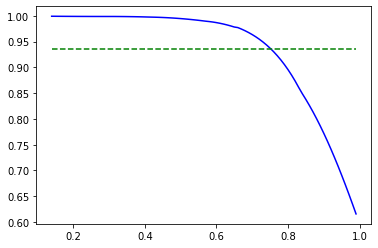

In [41]:
plt.plot(age, S, 'b-', label='data')
popt, pcov = curve_fit(exp_survival, age, S, p0 = 1, bounds=(0,float("inf")))
plt.plot(age, exp_survival(age, *popt)*np.ones(86), 'g--')

In [42]:
results(exp_survival,popt,pcov)
print("Confidence intervals: ")
getConfidenceIntervals(exp_survival, popt, 1, (0,float("inf")))

Probility of surviving the next three months given Surivival till Age 60 = 0.9833741854698006
standard deviation errors on the parameters
[1.17855203]
Confidence intervals: 


/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[ 6.706236436653995 , 6.706236436653995 ]


## Weibull Distribution 

$\large{X \sim Weibull(\alpha,\lambda)\ (\alpha>0 \ and \ \lambda>0)}$<br>
$\large{P_x(t) \sim \frac{e^{-(\lambda(x+t))^\alpha}}{e^{-(\lambda x)^\alpha}}}$<br>
$\large{\mu_x(t) \sim \alpha \lambda^{\alpha}(x+t)^{\alpha -1}}$




In [43]:
def weibull_survival(age,alpha,lam,t=0.01):
    return np.exp(-pow((lam*(age+t)),alpha))/np.exp(-pow((lam*(age)),alpha))

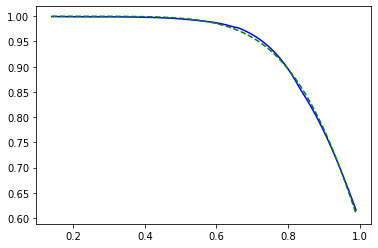

In [44]:
popt,pcov=fit_curve(age,S,weibull_survival,(1,1),((0,0),(float("inf"),float("inf"))))

In [45]:
results(weibull_survival,popt,pcov)
print("Confidence intervals: ")
getConfidenceIntervals(weibull_survival, popt, (1,1),((0,0),(float("inf"),float("inf"))))

Probility of surviving the next three months given Surivival till Age 60 = 0.9965424643036773
standard deviation errors on the parameters
[0.04403948 0.00190915]
Confidence intervals: 
[ 8.108163649891674 , 8.108163708821499 ]
[ 1.2561893557919035 , 1.2561893581023351 ]


## Pareto Distribution
$ \large{X \sim Pareto(\theta) \ (\theta > 0)}$<br>
$\large{P_x(t) = \frac{x^{\theta}}{(x+t)^{\theta}}}$<br>
$\large{\mu_x(t) = \frac{\theta}{x+t}}$

In [46]:
def pareto_survival(age,theta,t=0.01):
    return pow(age,theta)/pow((age+t),theta)

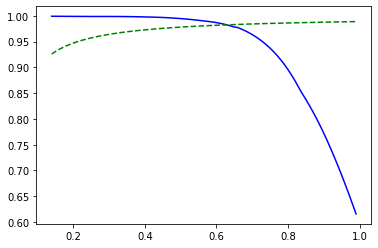

In [47]:
popt,pcov=fit_curve(age,S,pareto_survival,7,((0),(float("inf"))))

In [48]:
results(pareto_survival,popt,pcov)
print("Confidence intervals: ")
getConfidenceIntervals(pareto_survival, popt, 7,((0),(float("inf"))))

Probility of surviving the next three months given Surivival till Age 60 = 0.9953752689484279
standard deviation errors on the parameters
[0.49709074]
Confidence intervals: 
[ 1.1148260924440407 , 1.114826092456753 ]


## Makeham Gompertz
$\large{X \sim Gompertz(\alpha,\beta,\lambda)}$<br>
$\large{S_x(t)=e^{-\alpha t- \beta \lambda^{x} (\frac{\lambda^{t}-1}{\log \lambda}) }}$<br>
$\large{\mu_x(t)=\alpha + \beta \lambda^{x+t}}$

In [49]:
def make_gomp_survival(x,A,B,lam,t=0.01):
    return np.exp(-(t*A +B*pow(lam,x)*(pow(lam,t)-1)/np.log(lam)))

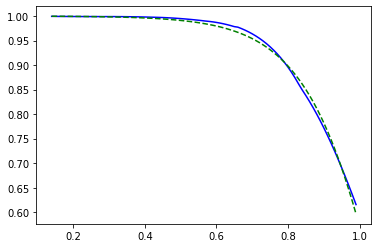

In [50]:
popt,pcov=fit_curve(age,S,make_gomp_survival,[1,0.5,1],bounds=((0,0,1), (100, 1., 10000)))

In [51]:
results(make_gomp_survival,popt,pcov)
print("Confidence intervals: ")
getConfidenceIntervals(make_gomp_survival, popt, [1,0.5,1],((0,0,1), (100, 1., 10000)))

Probility of surviving the next three months given Surivival till Age 60 = 0.9950095403766779
standard deviation errors on the parameters
[1.09526144e-01 1.67717604e-03 4.86648766e+02]
Confidence intervals: 
[ -6.208398718412727 , -4.659531628111018e-11 ]
[ -0.4983084787078568 , 0.013978448178425173 ]
[ 3850.939624480047 , 7700.986536926515 ]


## Burr Distribution
$\large{X \sim Burr(\gamma,\theta)}$<br>
$\large{S_x(t)=\frac{(1+x^{\gamma})^{\theta}}{(1+(x+t)^{\gamma})^{\theta}}}$<br>
$\large{\mu_x(t)=\frac{\gamma \theta (1+x^{\gamma})^{\theta}(x+t)^{\gamma -1}}{1+(x+t)^{\gamma}}}$

In [52]:
def burr_survival(x,gamma,theta,t=0.01):
    return pow(1+pow(x,gamma),theta)/pow(1+pow(x+t,gamma),theta)

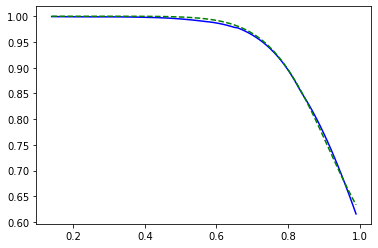

In [53]:
popt,pcov=fit_curve(age,S,burr_survival,(0.1,0.1),((0,0),(float('inf'),float('inf'))))

In [54]:
results(burr_survival,popt,pcov)
print("Confidence intervals: ")
getConfidenceIntervals(burr_survival, popt, (0.1,0.1),((0,0),(float('inf'),float('inf'))))

Probility of surviving the next three months given Surivival till Age 60 = 0.9980873726000076
standard deviation errors on the parameters
[0.06716871 0.04372561]
Confidence intervals: 
[ 10.432623549051128 , 10.43262354920771 ]
[ 8.952090091089016 , 8.952090091162312 ]


## Exponentiated exponential
$\large{X \sim Exponentiated \ Exp(\alpha,\lambda);}$<br>
$\large{S_x(t)=\frac{1-(1-e^{-\lambda(x+t)})^{\alpha}}{1-(1-e^{-\lambda x})^{\alpha}}}$<br>
$\large{\mu_x(t)=\frac{\alpha (1-e^{-\lambda(x+t)})^{\alpha-1} \lambda e^{-\lambda(x+t)}}{1-(1-e^{-\lambda(x+t)})^{\alpha}}}$

In [55]:
def exp_exp_survival(x,alpha,lam,t=0.01):
    return 1-pow(1-np.exp(-lam*(x+t)),alpha)/1-pow(1-np.exp(-lam*(x)),alpha)

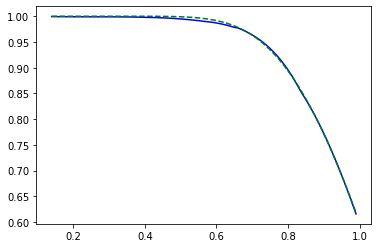

In [56]:
popt,pcov=fit_curve(age,S,exp_exp_survival,(1,1),((0,0),(float('inf'),float('inf'))))

In [57]:
results(exp_exp_survival,popt,pcov)
print("Confidence intervals: ")
getConfidenceIntervals(exp_exp_survival, popt, (1,1),((0,0),(float('inf'),float('inf'))))

Probility of surviving the next three months given Surivival till Age 60 = 0.9921487880131341
standard deviation errors on the parameters
[0.42521878 0.01565779]
Confidence intervals: 
[ 28.839188168422844 , 28.839188239722365 ]
[ 2.9009277484553238 , 2.900927750941297 ]


We can see that the values of survival for 3 months after the person has survived till age 60 agree for most distributions and is around 0.99. 

We see poor fitting for exponential and pareto distributions and we shall not use them for any future analysis.